## Vanishing Gradient

### What is vanishing gradient?
When there are more layers in the network, the value of the product of derivative decreases until at some point the partial derivative of the loss function approaches a value close to zero, and the partial derivative vanishes. We call this the vanishing gradient problem.

### The problem:
As more layers using certain activation functions are added to neural networks, the gradients of the loss function approaches zero, making the network hard to train.

### Why:
Certain activation functions, like the sigmoid function, squishes a large input space into a small input space between 0 and 1. Therefore, a large change in the input of the sigmoid function will cause a small change in the output. Hence, the derivative becomes small.

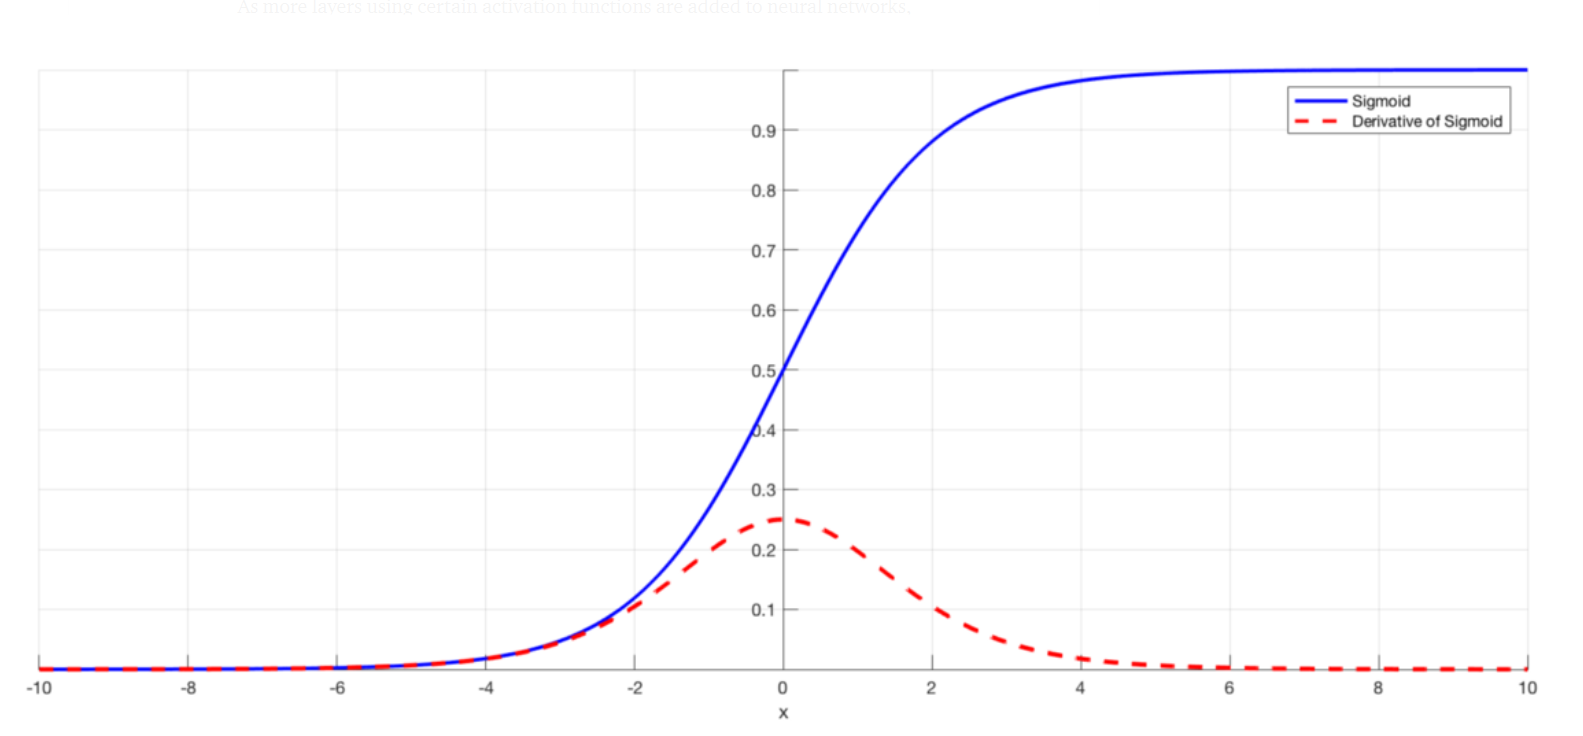

<center>The sigmoid function and its derivative</center>
As an example, Image 1 is the sigmoid function and its derivative. Note how when the inputs of the sigmoid function becomes larger or smaller (when |x| becomes bigger), the derivative becomes close to zero.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [2]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

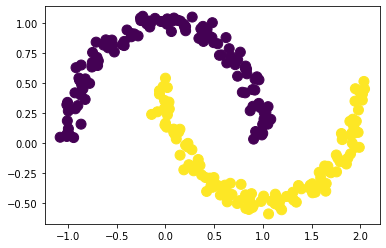

In [3]:
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

In [4]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Wheights of each layer

In [6]:
model.get_weights()

[array([[ 0.6676497 ,  0.14393854, -0.17656106,  0.36444753, -0.4210996 ,
         -0.30578634, -0.6182747 , -0.40987894, -0.32745925, -0.3831054 ],
        [-0.00508529,  0.66048676, -0.6140509 ,  0.15592259,  0.69701415,
         -0.33427054, -0.40435955,  0.4331383 ,  0.23878884, -0.03888065]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.01461625, -0.39619294,  0.21253335,  0.13719183, -0.36313492,
          0.22238117, -0.2272777 ,  0.02709579, -0.3957548 , -0.15444514],
        [ 0.23522067,  0.2770825 , -0.34282845,  0.2884903 ,  0.45718825,
         -0.2936796 , -0.10869089, -0.12667537,  0.3727997 ,  0.27559316],
        [ 0.11390483,  0.1040771 ,  0.20998949, -0.30579716,  0.235574  ,
         -0.2283374 , -0.0282988 , -0.1595101 , -0.26998168,  0.26551688],
        [-0.17016289, -0.4848315 ,  0.24717814, -0.542789  ,  0.54748344,
         -0.5114675 ,  0.10893911, -0.03726178,  0.18999362, -0.15206635],
        [-0.51291

## Let's check the wheights of first layer

In [7]:
model.get_weights()[0]

array([[ 0.6676497 ,  0.14393854, -0.17656106,  0.36444753, -0.4210996 ,
        -0.30578634, -0.6182747 , -0.40987894, -0.32745925, -0.3831054 ],
       [-0.00508529,  0.66048676, -0.6140509 ,  0.15592259,  0.69701415,
        -0.33427054, -0.40435955,  0.4331383 ,  0.23878884, -0.03888065]],
      dtype=float32)

In [8]:
old_weights = model.get_weights()[0]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Train the model with just one epoch, To check how much % change in weights

In [10]:
model.fit(X_train, y_train, epochs = 1)

7/7 [==============================] - 1s 2ms/step - loss: 0.7471 - accuracy: 0.4900


In [11]:
new_weights = model.get_weights()[0]
new_weights

array([[ 0.667647  ,  0.14392723, -0.17656676,  0.36444923, -0.42111266,
        -0.30577525, -0.61828375, -0.40989292, -0.32746342, -0.3831026 ],
       [-0.00508101,  0.6605003 , -0.6140441 ,  0.15591997,  0.69703174,
        -0.33428496, -0.40434623,  0.43315756,  0.23879422, -0.03888444]],
      dtype=float32)

In [12]:
model.optimizer.get_config()["learning_rate"]

0.001

In [13]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [14]:
gradient

array([[ 0.00268221,  0.01130998,  0.00570714, -0.00169873,  0.01305342,
        -0.01108646,  0.00905991,  0.01397729,  0.00417233, -0.00280142],
       [-0.00427803, -0.01353025, -0.00685453,  0.0026226 , -0.01758337,
         0.01442432, -0.01332164, -0.0192523 , -0.00537932,  0.00379607]],
      dtype=float32)

In [15]:
percent_change

array([[0.00040174, 0.00785751, 0.00323239, 0.00046611, 0.00309984,
        0.00362556, 0.00146535, 0.0034101 , 0.00127415, 0.00073124],
       [0.0841256 , 0.00204853, 0.00111628, 0.00168199, 0.00252267,
        0.00431516, 0.0032945 , 0.00444484, 0.00225275, 0.00976339]],
      dtype=float32)

In [16]:
old_weights

array([[ 0.6676497 ,  0.14393854, -0.17656106,  0.36444753, -0.4210996 ,
        -0.30578634, -0.6182747 , -0.40987894, -0.32745925, -0.3831054 ],
       [-0.00508529,  0.66048676, -0.6140509 ,  0.15592259,  0.69701415,
        -0.33427054, -0.40435955,  0.4331383 ,  0.23878884, -0.03888065]],
      dtype=float32)

In [17]:
new_weights

array([[ 0.667647  ,  0.14392723, -0.17656676,  0.36444923, -0.42111266,
        -0.30577525, -0.61828375, -0.40989292, -0.32746342, -0.3831026 ],
       [-0.00508101,  0.6605003 , -0.6140441 ,  0.15591997,  0.69703174,
        -0.33428496, -0.40434623,  0.43315756,  0.23879422, -0.03888444]],
      dtype=float32)

### Almost, there is no change = There is problem of Vanishing Gradient


## Let's repeate the model with 100 epoch

In [18]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
old_weights = model.get_weights()[0]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 0.7043 - accuracy: 0.5100
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.5100
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5100
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5100
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5100
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5100
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5100
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4700
Epoch 85/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4900
Epoch 86/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 87/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5100
Epoch 88/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 89/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 90/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5100
Epoch 91/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5100
Epoch 92/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 93/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 94/100
7/7 [===============

In [23]:
new_weights = model.get_weights()[0]
new_weights

array([[-0.2741878 , -0.47534278, -0.21139833,  0.4467172 ,  0.6289321 ,
         0.22159669,  0.34386647,  0.30736345, -0.38616064, -0.59562784],
       [-0.6339463 ,  0.31692383,  0.4703404 ,  0.507107  ,  0.6297265 ,
        -0.29003993, -0.47628143, -0.368835  ,  0.34252575,  0.07042906]],
      dtype=float32)

In [24]:
model.optimizer.get_config()["learning_rate"]

0.001

In [25]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [26]:
gradient

array([[  4.3313203,  27.839005 , -68.09377  , -73.7611   ,  21.20155  ,
         10.52168  , -95.33339  ,  52.758213 ,  89.868454 ,   8.698403 ],
       [ -3.8381813, -22.726208 ,  52.76456  ,  59.82536  , -21.169006 ,
         -8.276641 ,  76.92301  , -43.73392  , -75.35299  , -10.0568905]],
      dtype=float32)

In [27]:
percent_change

array([[ 1.6050459 ,  6.2209544 , 24.3634    , 19.777424  ,  3.2611065 ,
         4.532894  , 38.358433  , 14.650109  , 30.331026  ,  1.4820187 ],
       [ 0.60179913,  7.72481   , 10.0868025 , 10.552469  ,  3.4785547 ,
         2.774449  , 19.261648  , 10.600392  , 28.203848  , 16.658155  ]],
      dtype=float32)

In [28]:
old_weights

array([[-0.26985648, -0.44750378, -0.2794921 ,  0.3729561 ,  0.65013367,
         0.23211837,  0.24853307,  0.36012167, -0.2962922 , -0.58692944],
       [-0.6377845 ,  0.29419762,  0.52310497,  0.5669324 ,  0.6085575 ,
        -0.29831657, -0.39935842, -0.41256893,  0.26717275,  0.06037217]],
      dtype=float32)

In [29]:
new_weights

array([[-0.2741878 , -0.47534278, -0.21139833,  0.4467172 ,  0.6289321 ,
         0.22159669,  0.34386647,  0.30736345, -0.38616064, -0.59562784],
       [-0.6339463 ,  0.31692383,  0.4703404 ,  0.507107  ,  0.6297265 ,
        -0.29003993, -0.47628143, -0.368835  ,  0.34252575,  0.07042906]],
      dtype=float32)

### Conclusion: After running 100 epoch,  there is no visible change. This is because of complexity of the model i.e. Vanishing Gradient 

## Let's reduce the complexity of the model

In [30]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
model.get_weights()[0]

array([[-0.42388973,  0.41159517,  0.3334542 ,  0.5956115 ,  0.10577697,
         0.06791157,  0.47814256, -0.32167318,  0.20340657,  0.14281678],
       [ 0.58314985, -0.6356685 , -0.25913972,  0.15761995,  0.47742873,
         0.58121496, -0.08659846,  0.48561913, -0.31076962,  0.44549555]],
      dtype=float32)

In [33]:
old_weights = model.get_weights()[0]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 0.7139 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.4900
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.4900
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.4900
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4900
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4900
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4900
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4900
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4900
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4900
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8250
Epoch 85/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8250
Epoch 86/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.8250
Epoch 87/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8250
Epoch 88/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8150
Epoch 89/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8150
Epoch 90/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8250
Epoch 91/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8250
Epoch 92/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8250
Epoch 93/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8250
Epoch 94/100
7/7 [===============

In [36]:
new_weights = model.get_weights()[0]
new_weights

array([[-0.813501  ,  0.9456445 ,  0.6405936 ,  0.13710906,  0.6148178 ,
        -0.6238993 ,  0.91499394, -0.80885226,  0.78618205, -0.5529945 ],
       [ 1.4500432 , -1.7219023 , -0.99459517,  0.8075431 , -0.3336724 ,
         1.6770458 , -1.0238453 ,  1.4556323 , -1.3182797 ,  1.5085554 ]],
      dtype=float32)

In [37]:
model.optimizer.get_config()["learning_rate"]

0.001

In [38]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [39]:
gradient

array([[  389.61127,  -534.0493 ,  -307.13937,   458.50244,  -509.0408 ,
          691.8108 ,  -436.85135,   487.17905,  -582.77545,   695.8112 ],
       [ -866.8933 ,  1086.2336 ,   735.45544,  -649.9231 ,   811.1011 ,
        -1095.8308 ,   937.2468 ,  -970.0132 ,  1007.51013, -1063.0598 ]],
      dtype=float32)

In [40]:
percent_change

array([[  91.91336,  129.75111,   92.10842,   76.98012,  481.23978,
        1018.6937 ,   91.36426,  151.45157,  286.5077 ,  487.20557],
       [ 148.65706,  170.88054,  283.80655,  412.3356 ,  169.88947,
         188.54141, 1082.2905 ,  199.74773,  324.19843,  238.62413]],
      dtype=float32)

In [41]:
old_weights

array([[-0.42388973,  0.41159517,  0.3334542 ,  0.5956115 ,  0.10577697,
         0.06791157,  0.47814256, -0.32167318,  0.20340657,  0.14281678],
       [ 0.58314985, -0.6356685 , -0.25913972,  0.15761995,  0.47742873,
         0.58121496, -0.08659846,  0.48561913, -0.31076962,  0.44549555]],
      dtype=float32)

In [42]:
new_weights

array([[-0.813501  ,  0.9456445 ,  0.6405936 ,  0.13710906,  0.6148178 ,
        -0.6238993 ,  0.91499394, -0.80885226,  0.78618205, -0.5529945 ],
       [ 1.4500432 , -1.7219023 , -0.99459517,  0.8075431 , -0.3336724 ,
         1.6770458 , -1.0238453 ,  1.4556323 , -1.3182797 ,  1.5085554 ]],
      dtype=float32)

## ReLU function

### Other technique to deal with Vanishing Gradient - use ReLU function instead of Sigmoid function

In [43]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
old_weights = model.get_weights()[0]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [47]:
model.fit(X_train, y_train, epochs = 1)

7/7 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4200


In [48]:
new_weights = model.get_weights()[0]

In [49]:
model.optimizer.get_config()["learning_rate"]

0.001

In [50]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [51]:
gradient

array([[-5.1278768, -3.0395463,  1.7736479, -5.932271 , -1.662433 ,
        -5.6158824, -5.296297 , -6.6893845,  4.676774 , -6.7228074],
       [ 5.919225 ,  6.5103765,  5.00831  ,  6.3481326,  3.853738 ,
         6.042689 , -6.488129 ,  6.333202 , -5.91737  ,  6.468415 ]],
      dtype=float32)

In [52]:
percent_change

array([[ 1.1459904 ,  2.6697118 ,  1.7195228 ,  1.6412878 ,  0.24667928,
         4.8364596 ,  6.284745  ,  4.8504176 ,  2.0264118 ,  1.2445072 ],
       [ 6.1753864 ,  1.5909854 ,  1.4046744 ,  1.027274  ,  0.8218976 ,
        14.844917  ,  6.445297  ,  2.246766  ,  1.1511929 ,  1.1120118 ]],
      dtype=float32)

In [53]:
old_weights

array([[-0.44746247,  0.11385298,  0.10314769, -0.36144006, -0.6739249 ,
        -0.11611557, -0.08427227,  0.13791358, -0.23079091,  0.5401984 ],
       [ 0.0958519 ,  0.40920407,  0.35654598,  0.6179591 , -0.468883  ,
         0.04070544,  0.10066456,  0.2818808 ,  0.51402074,  0.58168584]],
      dtype=float32)

In [54]:
new_weights

array([[-0.4423346 ,  0.11689252,  0.10137404, -0.3555078 , -0.6722625 ,
        -0.11049969, -0.07897597,  0.14460297, -0.23546769,  0.5469212 ],
       [ 0.08993267,  0.4026937 ,  0.35153767,  0.61161095, -0.47273675,
         0.03466275,  0.10715269,  0.2755476 ,  0.5199381 ,  0.5752174 ]],
      dtype=float32)

In [55]:
# df.join(["old_weights", "new_weights"])

# # pd.DataFrame(np_array, columns=['old_weights', 'new_weights'])

In [56]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5400
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.6650
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.7450
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.8700
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.8800
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.8800
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.9250
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.8600
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.8450
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.8800
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 85/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 86/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 87/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 88/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 89/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 90/100
7/7 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 91/100
7/7 [==============================] - 0s 2ms/step - loss: 9.7357e-04 - accuracy: 1.0000
Epoch 92/100
7/7 [==============================] - 0s 2ms/step - loss: 9.2933e-04 - accuracy: 1.0000
Epoch 93/100
7/7 [==============================] - 0s 2ms/step - loss: 8.9822e-04 - accuracy: 1.0000
Epoch 94/100
7/7 [===

In [57]:
new_weights = model.get_weights()[0]

In [58]:
model.optimizer.get_config()["learning_rate"]

0.001

In [59]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [60]:
gradient

array([[ 180.30211  ,   98.06265  ,  207.55615  ,  115.04623  ,
         200.58452  ,  139.72562  ,   18.738485 ,   95.612816 ,
        -121.59332  ,   74.0627   ],
       [  -4.4011397, -246.14452  ,   37.58937  ,  -33.860085 ,
        -135.42586  ,  -79.746086 ,  -95.7179   , -260.00165  ,
         -33.145905 , -229.95876  ]], dtype=float32)

In [61]:
percent_change

array([[ 40.294353 ,  86.13096  , 201.2223   ,  31.829962 ,  29.76363  ,
        120.33324  ,  22.23565  ,  69.328064 ,  52.68549  ,  13.7102785],
       [  4.591604 ,  60.152023 ,  10.542644 ,   5.4793415,  28.882656 ,
        195.91014  ,  95.086006 ,  92.23816  ,   6.4483595,  39.533154 ]],
      dtype=float32)

In [62]:
old_weights

array([[-0.44746247,  0.11385298,  0.10314769, -0.36144006, -0.6739249 ,
        -0.11611557, -0.08427227,  0.13791358, -0.23079091,  0.5401984 ],
       [ 0.0958519 ,  0.40920407,  0.35654598,  0.6179591 , -0.468883  ,
         0.04070544,  0.10066456,  0.2818808 ,  0.51402074,  0.58168584]],
      dtype=float32)

In [63]:
new_weights

array([[-0.6277646 ,  0.01579032, -0.10440847, -0.4764863 , -0.87450945,
        -0.2558412 , -0.10301075,  0.04230076, -0.10919759,  0.46613568],
       [ 0.10025304,  0.6553486 ,  0.3189566 ,  0.65181917, -0.33345714,
         0.12045153,  0.19638246,  0.54188246,  0.54716665,  0.8116446 ]],
      dtype=float32)